# <center>python生成二维码</center>

By [青衣极客 Blue Geek](https://mp.weixin.qq.com/s/WkJQ_koCUlzj-lBA7UsLww)

In 2019-09-23

   二维码已经成为日常生活中不可缺少的一部分，无论是物品管理还是移动支付。随处可见的二维码是不是曾经让你觉得无比地神奇和有趣？生命是有限的，而知识是无限的，用有限的生命追求无限的知识是危险的。而python就完美契合这种哲学观念，不需要知道每一个功能背后的原理，用就完事了。本文就为大家演示一下python生成二维码的方法和效果，让大家先睹为快。如果大家的生活中需要用到自定义的二维码，也可以用这种简单的方式生成。
   
   首先还是导入qrcode这一个第三方库，如果没有安装的话，赶紧`pip install qrcode`安装一下。接着导入一下matplotlib，因为需要使用它来进行可视化。

In [2]:
import qrcode
%matplotlib notebook
import matplotlib.pyplot as plt

## 1. 简单的方式
   最简单的模式直接一行代码搞定二维码的生成，如果需要保存下来就两行代码。这里我们采用matplotlib直接可视化一下，以便直观感受科技的冲击。可以看出qrcode生成的二维码保存在自定义的一种数据结构当中，即`class 'qrcode.image.pil.PilImage`。这个无关紧要，因为虽然是自定义的数据结构，但是跟常用库之间的交互是方便的，matplotlib就可以直接可视化。看着生成的结果是不错，就是能不能生成更大更复杂一些的二维码呢？答案是显然的。

<class 'qrcode.image.pil.PilImage'>


<IPython.core.display.Javascript object>


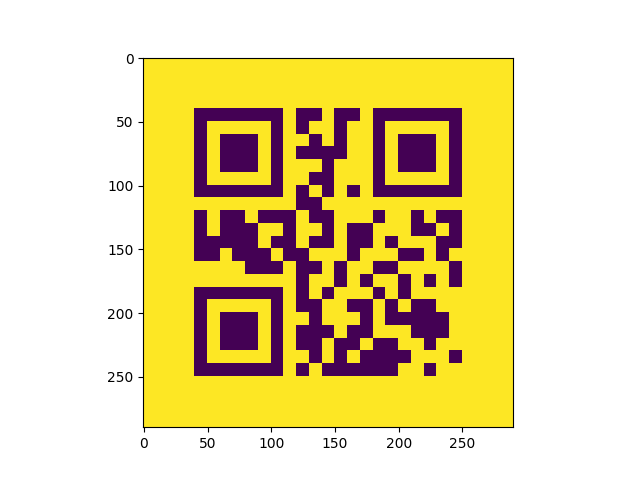

In [9]:
img = qrcode.make('Hello, World')
print(type(img))
plt.figure()
plt.imshow(img)
plt.show()

## 2. 灵活的方式
   先用qrcode.QRCode类构造一个qr对象，然后利用该对象来设置和生成二维码，就被称作“高级模式”。高不高级的我们不太清楚，倒是灵活不少。接下来需要讲讲参数的设置，毕竟我们是API一族。
   
   1. version参数用于控制二维码的大小，取值范围从[1,40]， 取值20的时候图像就已经很大，所以这个参数范围完全够用。
   
   2. box_size参数用于控制每个最小的格子包含了多少像素。
   
   3. border参数用于控制边框包含多少格子
   
   4. error_correction参数控制纠错码的能力， ERROR_CORRECT_L(<=7%), ERROR_CORRECT_M(<=15%), ERROR_CORRECT_H(<=30%)

然后加入需要编码的数据，就可以生成二维码了。

<IPython.core.display.Javascript object>


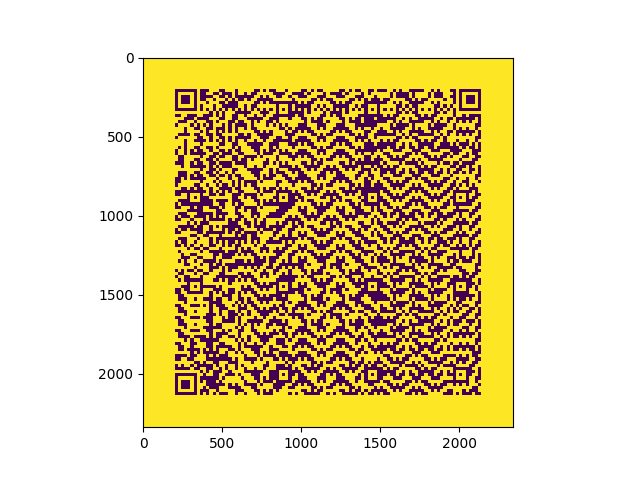

In [18]:
qr = qrcode.QRCode(
    version=20,
    box_size=20,
    border=10,
    error_correction=qrcode.constants.ERROR_CORRECT_L
)
qr.add_data('Hello, World')
qr.make(fit=True)
img = qr.make_image()
plt.figure()
plt.imshow(img)
plt.show()

## 3. 保存到文件
更常用的方式是将二维码保存成图片，然后分享给别人，或者打印出来贴在物品上。qrcode自然也是提供了这种常用功能。对于生成的二维码对象直接食用save函数就可以保存成图片。我们先用指令检查一下图片文件的生成情况，发现文件确实存在了。然后调用matplotlib打印出来看看，完全符合预期。

qrcode.png


<IPython.core.display.Javascript object>


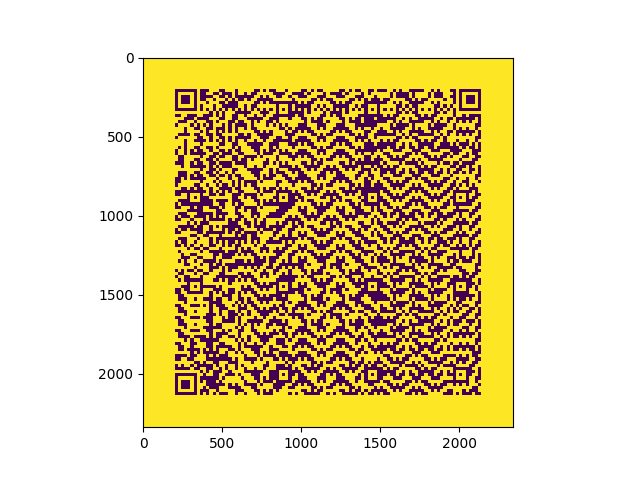

In [13]:
img.save('../../output/qrcode.png')
!ls ../../output | grep "qrcode"
plt.figure()
plt.imshow(plt.imread('../../output/qrcode.png'))
plt.show()

到此，python生成二维码的方法演示完毕，大家是不是跃跃欲试呢！操作简单，毫无门槛，大家一试便知。